# Parte 1 - Árvore de decisão no python

## Regressão

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('data\Position_Salaries.csv')

In [3]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1:].values

In [4]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
y_pred = regressor.predict([[6.5]])

In [7]:
y[5]

array([150000], dtype=int64)

In [8]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [41]:
y_pred

array([150000.])

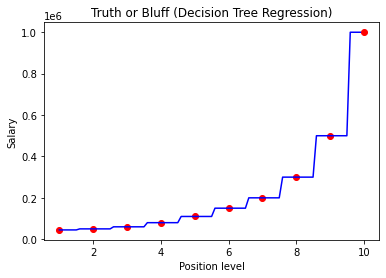

In [9]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Classificação

### Import

In [31]:
dataset1 = pd.read_csv('data\Social_Network_Ads.csv')

X = dataset1.iloc[:, :-1].values
y = dataset1.iloc[:, -1:].values

### Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Train and predict

In [21]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
y_pred = classifier.predict(X_test)

### Visualize the tree

In [29]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Repositorios\pyspark_decision_tree\venv\Lib\site-packages\graphviz'

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(classifier, out_file = None)
graph = graphviz.Source(dot_data)
#graph.render("Social Network Ads")

In [30]:
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [36]:
dataset1['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[62  6]
 [ 3 29]]


0.91

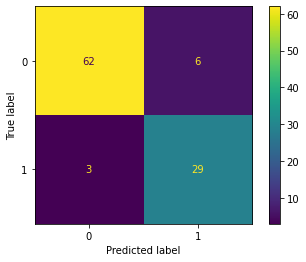

In [40]:
plot_confusion_matrix(classifier, X_test, y_test)

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_score = roc_auc_score(y_test, y_pred)
roc_curve = roc_curve(y_test, y_pred)

In [16]:
roc_score

0.9090073529411765

In [17]:
roc_curve

(array([0.        , 0.08823529, 1.        ]),
 array([0.     , 0.90625, 1.     ]),
 array([2, 1, 0], dtype=int64))

In [18]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_curve[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

NameError: name 'fpr' is not defined

<Figure size 432x288 with 0 Axes>